In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from imblearn.over_sampling import SMOTE
import shap
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Load dataset (download from Kaggle link)
df = pd.read_csv("/content/bmd.csv")
df.fillna(df.mean(numeric_only=True), inplace=True)
df = df.select_dtypes(include=['float64', 'int64'])
print("✅ Data Loaded — Shape:", df.shape)
df.head()

✅ Data Loaded — Shape: (169, 6)


,id,age,weight_kg,height_cm,waiting_time,bmd
0,469,57.052768,64.0,155.5,18,0.8793
1,8724,75.741225,78.0,162.0,56,0.7946
2,6736,70.778900,73.0,170.5,10,0.9067
3,24180,78.247175,60.0,148.0,14,0.7112
4,17072,54.191877,55.0,161.0,20,0.7909


In [ ]:
# Check for nulls
print(df.isnull().sum())

# Fill missing values if any (none usually in this dataset)
df = df.fillna(df.mean())

id              0
age             0
weight_kg       0
height_cm       0
waiting_time    0
bmd             0
dtype: int64


In [ ]:
X = df.drop(df.columns[-1], axis=1)   # features
y = df[df.columns[-1]]                # target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X = pd.DataFrame(X_scaled, columns=X.columns)


In [ ]:
from imblearn.over_sampling import SMOTE
import numpy as np
import pandas as pd

median = df[df.columns[-1]].median()
y = np.where(df[df.columns[-1]] > median, 1, 0)

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

print("Before SMOTE:", pd.Series(y).value_counts().to_dict())
print("After SMOTE:", pd.Series(y_res).value_counts().to_dict())


Before SMOTE: {0: 85, 1: 84}
After SMOTE: {1: 85, 0: 85}


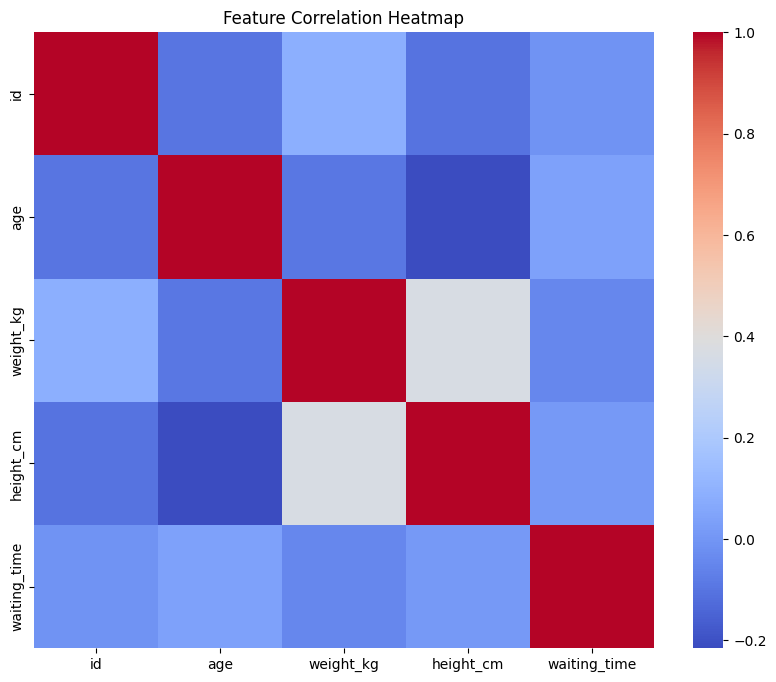

Dropped features: []


In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(X.corr(), cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

corr_matrix = X.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.85)]
X_reduced = X.drop(columns=to_drop)
print("Dropped features:", to_drop)


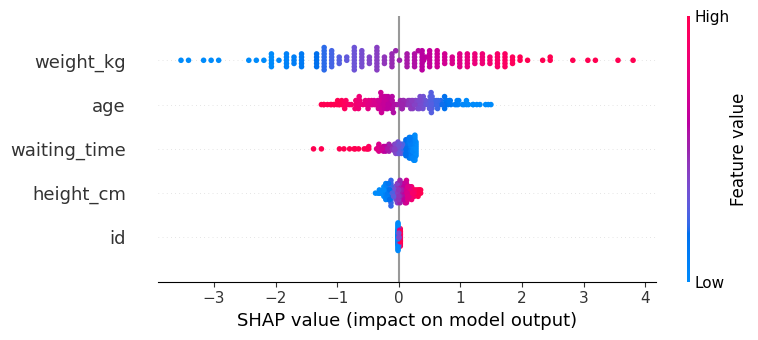

In [ ]:
model = LogisticRegression(max_iter=1000)
model.fit(X_res.drop(columns=to_drop, errors='ignore'), y_res)

explainer = shap.Explainer(model, X_res.drop(columns=to_drop, errors='ignore'))
shap_values = explainer(X_res.drop(columns=to_drop, errors='ignore'))
shap.summary_plot(shap_values, X_res.drop(columns=to_drop, errors='ignore'))


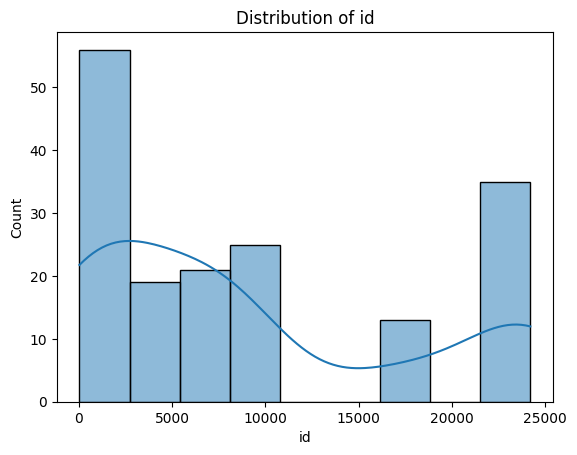

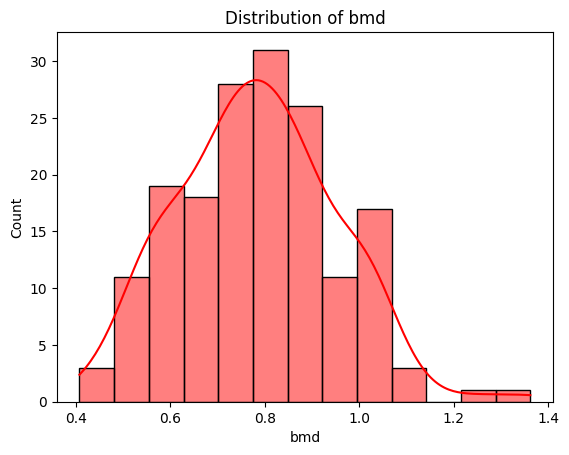

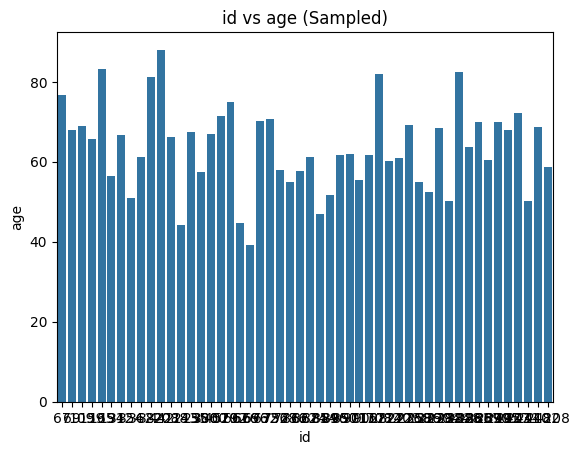

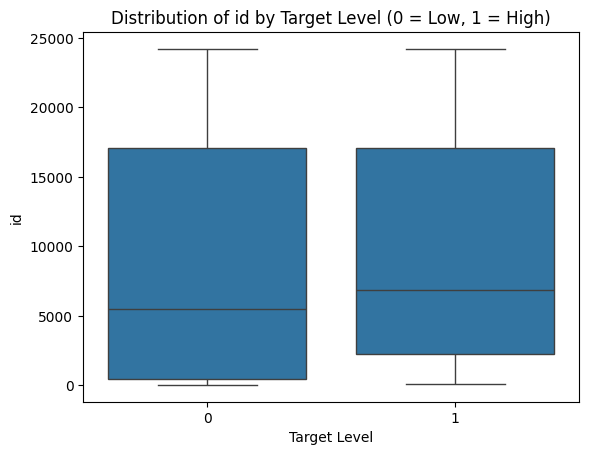

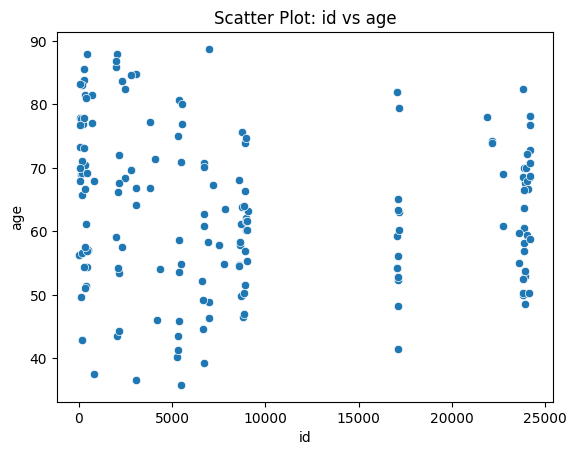

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1️⃣ Distribution of first numeric column
sns.histplot(df[df.columns[0]], kde=True)
plt.title(f"Distribution of {df.columns[0]}")
plt.xlabel(df.columns[0])
plt.show()

# 2️⃣ Distribution of target (last column)
sns.histplot(df[df.columns[-1]], kde=True, color='red')
plt.title(f"Distribution of {df.columns[-1]}")
plt.xlabel(df.columns[-1])
plt.show()

# 3️⃣ Bar chart – first two numeric columns
sns.barplot(x=df.columns[0], y=df.columns[1], data=df.sample(50, random_state=42))
plt.title(f"{df.columns[0]} vs {df.columns[1]} (Sampled)")
plt.xlabel(df.columns[0])
plt.ylabel(df.columns[1])
plt.show()

# 4️⃣ Boxplot – first numeric column vs binary target (y)
sns.boxplot(x=y, y=df[df.columns[0]])
plt.title(f"Distribution of {df.columns[0]} by Target Level (0 = Low, 1 = High)")
plt.xlabel("Target Level")
plt.ylabel(df.columns[0])
plt.show()

# 5️⃣ Scatter Plot – first two numeric columns
sns.scatterplot(x=df.columns[0], y=df.columns[1], data=df)
plt.title(f"Scatter Plot: {df.columns[0]} vs {df.columns[1]}")
plt.xlabel(df.columns[0])
plt.ylabel(df.columns[1])
plt.show()


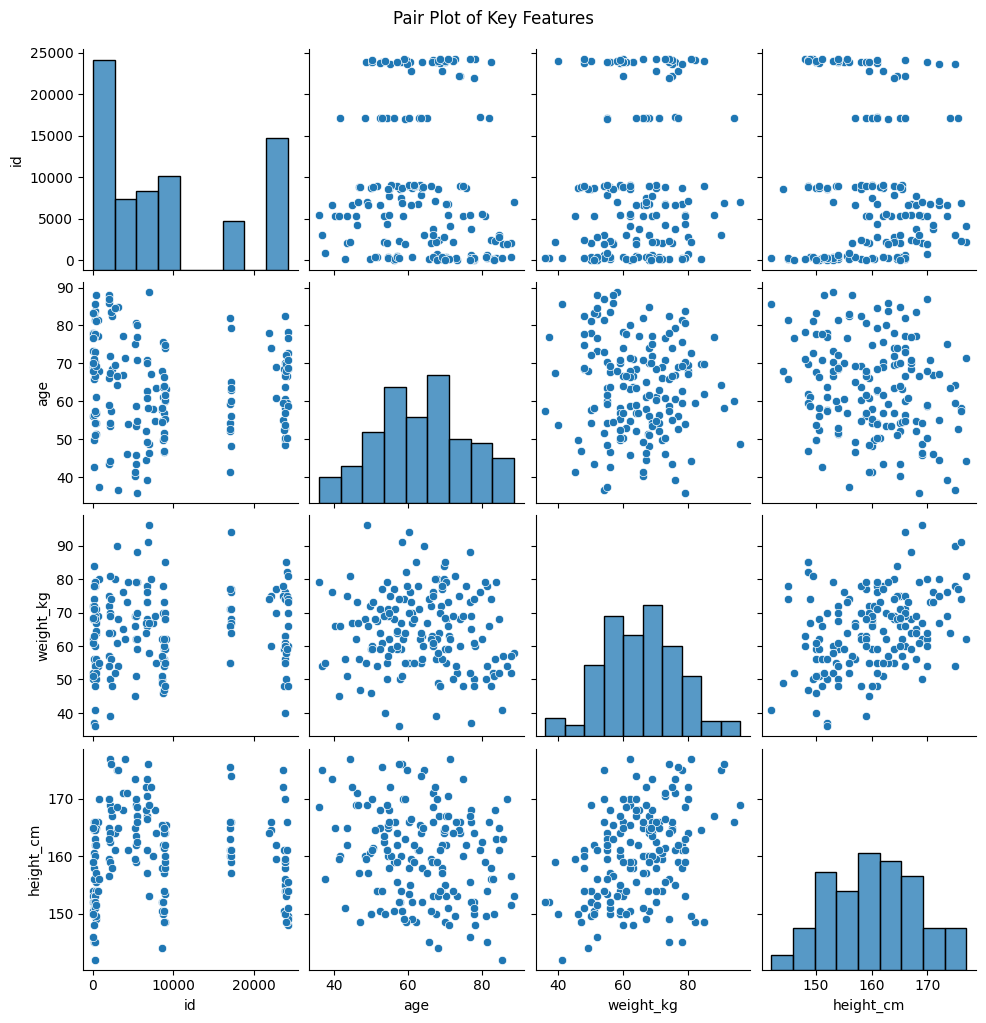

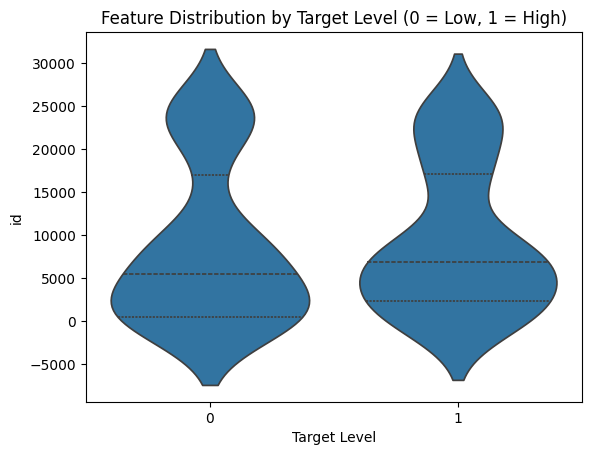

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pair Plot – first 4 numeric columns (auto-adjusted)
sns.pairplot(df.select_dtypes(include=['float64', 'int64']).iloc[:, :4])
plt.suptitle("Pair Plot of Key Features", y=1.02)
plt.show()

# Violin Plot – first numeric column vs binary target
sns.violinplot(x=y, y=df.select_dtypes(include=['float64', 'int64']).iloc[:, 0], inner='quartile')
plt.title("Feature Distribution by Target Level (0 = Low, 1 = High)")
plt.xlabel("Target Level")
plt.ylabel(df.select_dtypes(include=['float64', 'int64']).columns[0])
plt.show()


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier, ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import time
import numpy as np
import pandas as pd

# Use full dataset (no sampling)
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.2, random_state=42, stratify=y_res
)

models = {
    "Logistic Regression": LogisticRegression(max_iter=300, solver='liblinear'),
    "Decision Tree": DecisionTreeClassifier(max_depth=5, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=50, random_state=42),
    "Naive Bayes": GaussianNB(),
    "AdaBoost": AdaBoostClassifier(n_estimators=50, random_state=42),
    "Extra Trees": ExtraTreesClassifier(n_estimators=50, random_state=42)
}

results = []
for name, model in models.items():
    start = time.time()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    try:
        y_prob = model.predict_proba(X_test)[:, 1]
        auc = roc_auc_score(y_test, y_prob)
    except:
        auc = np.nan

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results.append([name, acc, prec, rec, f1, auc, round(time.time() - start, 2)])

results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1", "AUC", "Time(s)"])
print("✅ All models trained successfully!")
results_df.sort_values(by="Accuracy", ascending=False)


✅ All models trained successfully!


,Model,Accuracy,Precision,Recall,F1,AUC,Time(s)
4,AdaBoost,0.764706,0.800000,0.705882,0.750000,0.821799,0.13
2,Random Forest,0.764706,0.846154,0.647059,0.733333,0.839100,0.10
3,Naive Bayes,0.705882,0.705882,0.705882,0.705882,0.788927,0.01
5,Extra Trees,0.705882,0.684211,0.764706,0.722222,0.794118,0.08
0,Logistic Regression,0.676471,0.666667,0.705882,0.685714,0.792388,0.02
1,Decision Tree,0.647059,0.727273,0.470588,0.571429,0.717993,0.01


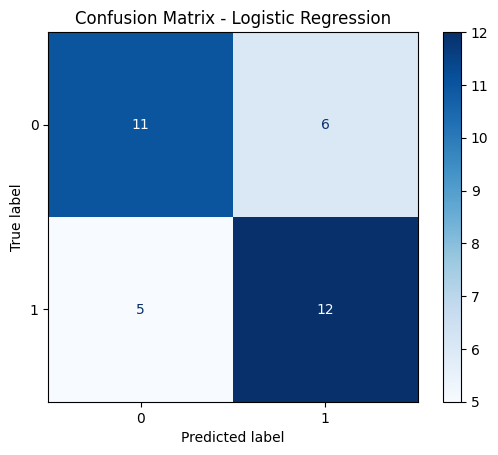

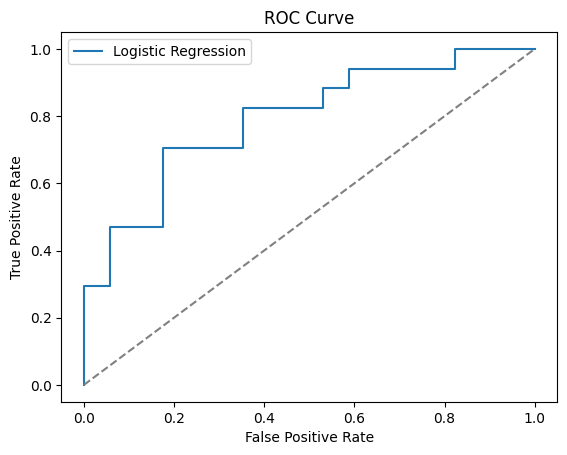

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, roc_curve
import matplotlib.pyplot as plt

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot(cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label='Logistic Regression')
plt.plot([0, 1], [0, 1], '--', color='gray')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report

ensemble_models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

for name, model in ensemble_models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n{name} Results:")
    print(classification_report(y_test, y_pred))



Random Forest Results:
              precision    recall  f1-score   support

           0       0.70      0.82      0.76        17
           1       0.79      0.65      0.71        17

    accuracy                           0.74        34
   macro avg       0.74      0.74      0.73        34
weighted avg       0.74      0.74      0.73        34


AdaBoost Results:
              precision    recall  f1-score   support

           0       0.74      0.82      0.78        17
           1       0.80      0.71      0.75        17

    accuracy                           0.76        34
   macro avg       0.77      0.76      0.76        34
weighted avg       0.77      0.76      0.76        34


Gradient Boosting Results:
              precision    recall  f1-score   support

           0       0.65      0.76      0.70        17
           1       0.71      0.59      0.65        17

    accuracy                           0.68        34
   macro avg       0.68      0.68      0.67        34
wei

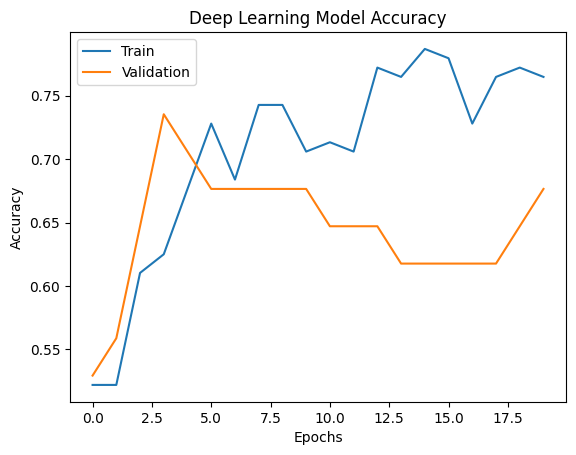

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt

model_dl = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_dl.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model_dl.fit(X_train, y_train, epochs=20, batch_size=32,
                       validation_data=(X_test, y_test), verbose=0)

plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Deep Learning Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
